# Topic 32: Pipelines (and GridSearch)

Gridsearch: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Pipelines: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [25]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

from sklearn.metrics import plot_confusion_matrix, classification_report

df = pd.read_csv('data_banknote_authentication.csv')
df.columns = ["Variance","Skewness", "Curtosis","Entropy","Class"]

In [7]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

## GridSearch: For Hyperparameter Tuning

#### Important Parameters for GridSearchCV

1. scoring: How you want Gridsearch to pick the best combination of parameters. Accuracy? Recall?
2. cv: How many folds of cross validation per combination of parameters
3. verbose: Controls how much information is output

#### Important Attributes of GridSearchCV

1. cv_results_
2. best_params_
3. best_estimator_


GridSearch works like a model object!

In [15]:
# define the parameters you want to search through
knn_grid = {'n_neighbors': [1, 2, 3, 4, 5],
           'weights': ['uniform', 'distance']}

# instantiate gridsearch
knn_search = GridSearchCV(KNeighborsClassifier(), knn_grid, scoring='accuracy', verbose=1)

# fit the grid
knn_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [17]:
pd.DataFrame(knn_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002357,0.000386,0.007206,0.000761,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",1.0,0.995434,1.0,1.0,1.0,0.999087,0.001826,5
1,0.001884,0.000036,0.001932,0.000016,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",1.0,0.995434,1.0,1.0,1.0,0.999087,0.001826,5
2,0.001778,0.000076,0.006106,0.000283,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
3,0.001716,0.000055,0.001841,0.000048,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",1.0,0.995434,1.0,1.0,1.0,0.999087,0.001826,5
4,0.001757,0.000087,0.005959,0.000135,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",1.0,0.995434,1.0,1.0,1.0,0.999087,0.001826,5
5,0.001661,0.000064,0.001828,0.000046,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",1.0,0.995434,1.0,1.0,1.0,0.999087,0.001826,5
6,0.001806,0.000185,0.006469,0.000793,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
7,0.001923,0.000486,0.001967,0.000345,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",1.0,0.995434,1.0,1.0,1.0,0.999087,0.001826,5
8,0.001679,0.000174,0.006550,0.000927,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1
9,0.001801,0.000172,0.002043,0.000197,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",1.0,1.000000,1.0,1.0,1.0,1.000000,0.000000,1


In [18]:
knn_search.best_params_

{'n_neighbors': 2, 'weights': 'uniform'}

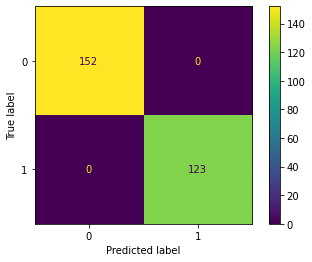

In [23]:
test_preds = knn_search.predict(X_test)
plot_confusion_matrix(knn_search, X_test, y_test)

In [27]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       123

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



## Pipelines: Combining Preprocessing Steps

Also works as a model object!

In [32]:
# defined as a list of tuples - name of the step and the object for that step
# for imbalanced data, you can also add SMOTE to your pipeline

scaled_pipeline_1 = Pipeline([('ss', StandardScaler()), 
                              ('knn', KNeighborsClassifier())])
scaled_pipeline_1.fit(X_train, y_train)
test_preds = scaled_pipeline_1.predict(X_test)

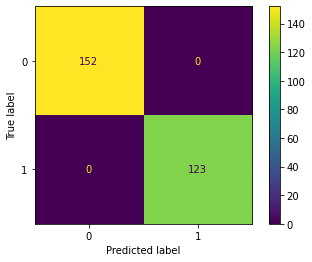

In [31]:
plot_confusion_matrix(scaled_pipeline_1, X_test, y_test)

In [33]:
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       123

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



### Accessing Pipeline Attributes

In [35]:
scaled_pipeline_1['knn'].predict_proba(X_test)

array([[1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. ,

## Combining GridSearch with Pipelines

In [36]:
# defining pipeline + setting up grid for gridsearch w Random Forest

scaled_pipeline_2 = Pipeline([('ss', StandardScaler()), 
                              ('RF', RandomForestClassifier(random_state=123))])

grid = [{'RF__max_depth': [4, 5], 
         'RF__min_samples_split': [5, 10], 
         'RF__min_samples_leaf': [3, 5]}]

In [38]:
# perform gridsearch

gridsearch = GridSearchCV(estimator=scaled_pipeline_2, 
                          param_grid=grid, 
                          scoring='accuracy', 
                          cv=5)

gridsearch.fit(X_train, y_train)
test_preds = gridsearch.predict(X_test)

In [39]:
gridsearch.best_params_

{'RF__max_depth': 5, 'RF__min_samples_leaf': 3, 'RF__min_samples_split': 10}

In [41]:
gridsearch.best_estimator_['RF'].feature_importances_

array([0.5960043 , 0.21380785, 0.14927964, 0.04090821])

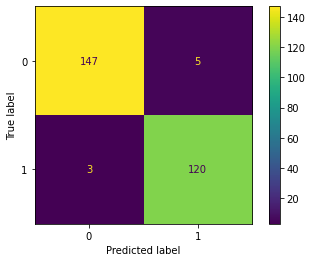

In [42]:
plot_confusion_matrix(gridsearch, X_test, y_test)